In [1]:
import os
import glob
import numpy as np
import tifffile as tif
from dotenv import load_dotenv
from pathlib import Path

In [2]:
load_dotenv()

True

In [3]:
data_splits = ["train", "valid", "test"]
data_folder = Path(os.getenv("DATADIR"))
subset_folders = [data_folder / subset for subset in data_splits]

In [4]:
palette = {
    0: (255, 0, 0),
    1: (255, 255, 255),
    2: (0, 0, 255),
    3: (0, 255, 255),
    4: (0, 255, 0),
    5: (255, 255, 0),
    255: (0, 0, 0)
}

In [5]:
subsets = dict()

for name, path in zip(data_splits, subset_folders):
    print(f"Processing path: {path}")
    images = sorted(list(glob.glob(str(path / "*rgbir.tif"))))
    masks = sorted(list(glob.glob(str(path / "*mask.tif"))))
    dsms = sorted(list(glob.glob(str(path / "*dsm.tif"))))
    assert len(images) == len(masks) == len(dsms)
    subsets[name] = (images, masks, dsms)

Processing path: /mnt/userdata/arnaudo_data/satmib/potsdam/train
Processing path: /mnt/userdata/arnaudo_data/satmib/potsdam/valid
Processing path: /mnt/userdata/arnaudo_data/satmib/potsdam/test


In [6]:
for name, (images, masks, dsms) in subsets.items():
    print(f"{name:<6s}: {len(images):>6d}")

train :   5400
valid :      0
test  :   3150


In [7]:
def mask_to_rgb(mask: np.ndarray, palette: dict) -> np.ndarray:
    lut = np.zeros((256, 3), dtype=np.uint8)
    for index, color in palette.items():
        lut[index] = np.array(color, dtype=np.uint8)
    return lut[mask]

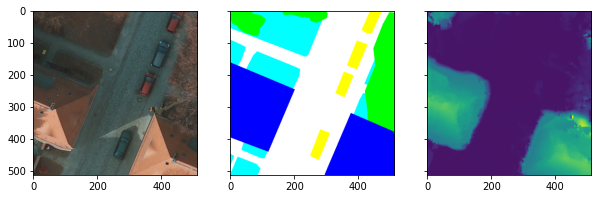

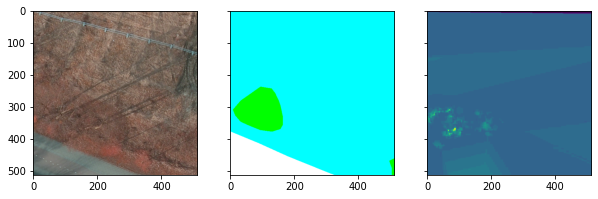

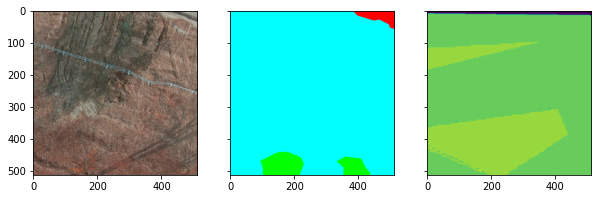

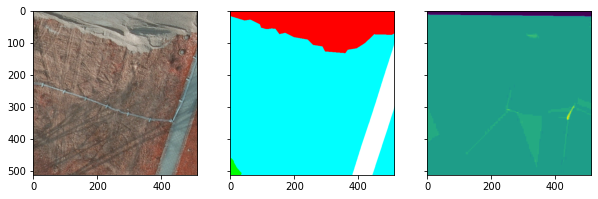

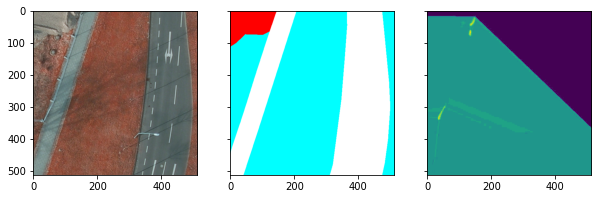

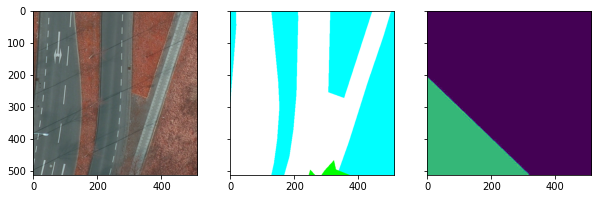

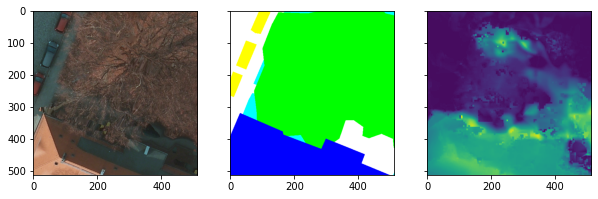

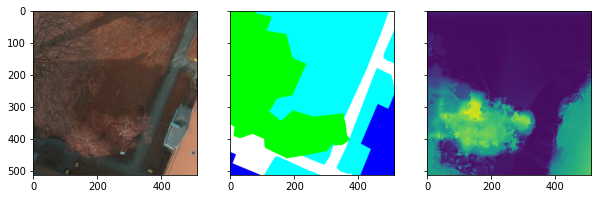

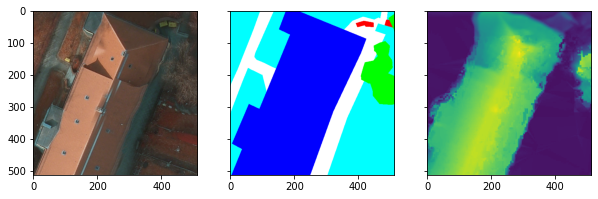

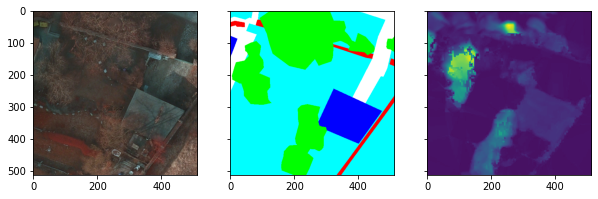

In [8]:
from matplotlib import pyplot as plt

subset = "train"
samples = 10
# R:0, G:1, B:2, NIR:3
channels = [3,1,2]

images, masks, dsms = subsets[subset]
for index in range(samples):
    img = tif.imread(images[index])
    msk = tif.imread(masks[index])
    dsm = tif.imread(dsms[index])

    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 20))
    axes[0].imshow(img[:,:,channels])
    axes[1].imshow(mask_to_rgb(msk, palette))
    axes[2].imshow(dsm)
    plt.show()
    plt.close(fig)